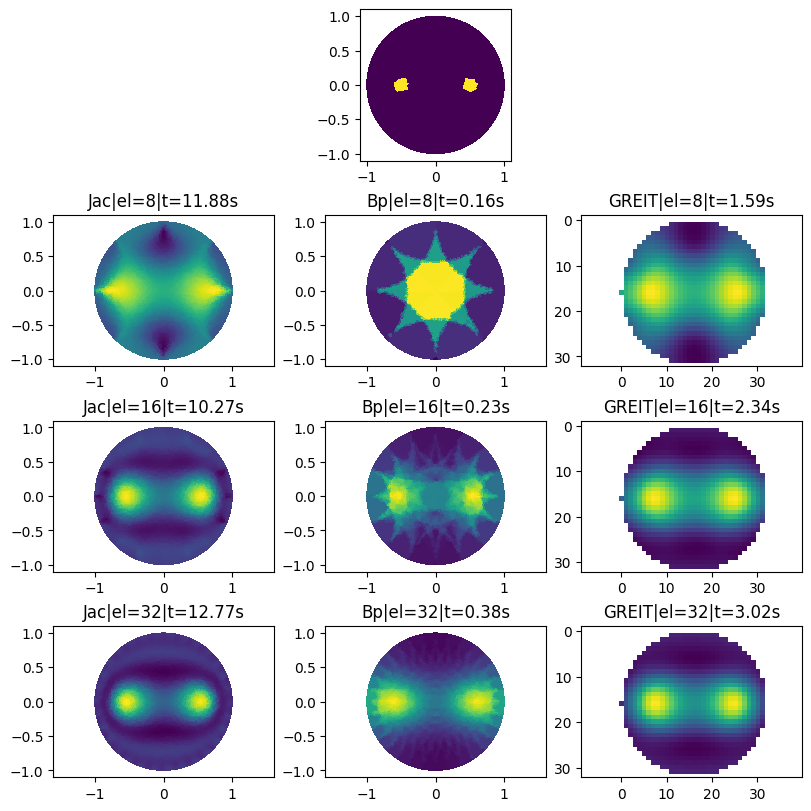

In [6]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import numpy as np
import pyeit.eit.jac as jac
import numpy as np
import pyeit.eit.bp as bp
import pyeit.eit.greit as greit
import pyeit.mesh as mesh
import time
from pyeit.eit.fem import EITForward
from pyeit.eit.interp2d import sim2pts
import pyeit.eit.protocol as protocol
from pyeit.mesh.wrapper import PyEITAnomaly_Circle

mr = 0.03
n_el1 = 8 
n_el2 = 16
n_el3 = 32
anomaly = [
  
    PyEITAnomaly_Circle(center=[-0.5, 0], r=0.1, perm=10.0),
    PyEITAnomaly_Circle(center=[0.5 , 0], r=0.1, perm=10.0)
]
""" 0. build mesh """
n_el = n_el1 # nb of electrodes
mesh_obj= mesh.create(n_el, h0=mr)
# extract node, element, alpha
pts = mesh_obj.node
tri = mesh_obj.element
x, y = pts[:, 0], pts[:, 1]

""" 1. problem setup """
mesh_new= mesh.set_perm(mesh_obj, anomaly=anomaly)


# plot ground truth
fig, axes = plt.subplots(4, 3, constrained_layout=True)
fig.set_size_inches(8, 8)

ax = axes[0,1]
delta_perm = mesh_new.perm - mesh_obj.perm
im = ax.tripcolor(x, y, tri, np.real(delta_perm), shading="flat")
ax.set_aspect("equal")


""" 2. FEM simulation """
# setup EIT scan conditions
protocol_obj = protocol.create(n_el, dist_exc=n_el//2, step_meas=1, parser_meas="std")

# calculate simulated data
fwd = EITForward(mesh_obj, protocol_obj)
v0 = fwd.solve_eit()
v1 = fwd.solve_eit(perm=mesh_new.perm)

""" 3.1. JAC solver """
start=time.time()
eit = jac.JAC(mesh_obj, protocol_obj)
eit.setup(p=0.5, lamb=0.01, method="kotre", perm=1, jac_normalized=True)
ds = eit.solve(v1, v0, normalize=True)
ds_n = sim2pts(pts, tri, np.real(ds))
end=time.time()
duration = end-start


# plot EIT reconstruction JAC
ax = axes[1,0]
im = ax.tripcolor(x, y, tri, ds_n, shading="flat")
ax.set_title(f'Jac|el={n_el}|t={round(duration,2)}s')
ax.axis("equal")


""" 3.2. naive inverse solver using back-projection """
start=time.time()
eit = bp.BP(mesh_obj, protocol_obj)
eit.setup(weight="none")
# the normalize for BP when dist_exc>4 should always be True
ds = 192.0 * eit.solve(v1, v0, normalize=True)
end=time.time()
duration = end-start

# plot EIT reconstruction Backprojection
ax = axes[1,1]
im = ax.tripcolor(pts[:, 0], pts[:, 1], tri, ds)
ax.set_title(f'Bp|el={n_el}|t={round(duration,2)}s')
ax.axis("equal")


""" 3.3. Construct using GREIT """
start=time.time()
eit = greit.GREIT(mesh_obj, protocol_obj)
eit.setup(p=0.50, lamb=0.01, perm=1, jac_normalized=True)
ds = eit.solve(v1, v0, normalize=True)
end=time.time()
duration = end-start
x, y, ds = eit.mask_value(ds, mask_value=np.NAN)

# plot EIT reconstruction GREIT
ax = axes[1,2]
im = ax.imshow(np.real(ds), interpolation="none", cmap=plt.cm.viridis)
ax.set_title(f'GREIT|el={n_el}|t={round(duration,2)}s')
ax.axis("equal")






""" 0. build mesh """
n_el = n_el2  # nb of electrodes
mesh_obj= mesh.create(n_el, h0=mr)
# extract node, element, alpha
pts = mesh_obj.node
tri = mesh_obj.element
x, y = pts[:, 0], pts[:, 1]

""" 1. problem setup """
mesh_new= mesh.set_perm(mesh_obj, anomaly=anomaly)


""" 2. FEM simulation """
# setup EIT scan conditions
protocol_obj = protocol.create(n_el, dist_exc=n_el//2, step_meas=1, parser_meas="std")

# calculate simulated data
fwd = EITForward(mesh_obj, protocol_obj)
v0 = fwd.solve_eit()
v1 = fwd.solve_eit(perm=mesh_new.perm)

""" 3.1. JAC solver """
start=time.time()
eit = jac.JAC(mesh_obj, protocol_obj)
eit.setup(p=0.5, lamb=0.01, method="kotre", perm=1, jac_normalized=True)
ds = eit.solve(v1, v0, normalize=True)
ds_n = sim2pts(pts, tri, np.real(ds))
end=time.time()
duration = end-start


# plot EIT reconstruction JAC
ax = axes[2,0]
im = ax.tripcolor(x, y, tri, ds_n, shading="flat")
ax.set_title(f'Jac|el={n_el}|t={round(duration,2)}s')
ax.axis("equal")


""" 3.2. naive inverse solver using back-projection """
start=time.time()
eit = bp.BP(mesh_obj, protocol_obj)
eit.setup(weight="none")
# the normalize for BP when dist_exc>4 should always be True
ds = 192.0 * eit.solve(v1, v0, normalize=True)
end=time.time()
duration = end-start

# plot EIT reconstruction Backprojection
ax = axes[2,1]
im = ax.tripcolor(pts[:, 0], pts[:, 1], tri, ds)
ax.set_title(f'Bp|el={n_el}|t={round(duration,2)}s')
ax.axis("equal")


""" 3.3. Construct using GREIT """
start=time.time()
eit = greit.GREIT(mesh_obj, protocol_obj)
eit.setup(p=0.50, lamb=0.01, perm=1, jac_normalized=True)
ds = eit.solve(v1, v0, normalize=True)
end=time.time()
duration = end-start
x, y, ds = eit.mask_value(ds, mask_value=np.NAN)

# plot EIT reconstruction GREIT
ax = axes[2,2]
im = ax.imshow(np.real(ds), interpolation="none", cmap=plt.cm.viridis)
ax.set_title(f'GREIT|el={n_el}|t={round(duration,2)}s')
ax.axis("equal")







""" 0. build mesh """
n_el = n_el3  # nb of electrodes
mesh_obj= mesh.create(n_el, h0=mr)
# extract node, element, alpha
pts = mesh_obj.node
tri = mesh_obj.element
x, y = pts[:, 0], pts[:, 1]


""" 1. problem setup """
mesh_new= mesh.set_perm(mesh_obj, anomaly=anomaly)



""" 2. FEM simulation """
# setup EIT scan conditions
protocol_obj = protocol.create(n_el, dist_exc=n_el//2, step_meas=1, parser_meas="std")

# calculate simulated data
fwd = EITForward(mesh_obj, protocol_obj)
v0 = fwd.solve_eit()
v1 = fwd.solve_eit(perm=mesh_new.perm)

""" 3.1. JAC solver """
start=time.time()
eit = jac.JAC(mesh_obj, protocol_obj)
eit.setup(p=0.5, lamb=0.01, method="kotre", perm=1, jac_normalized=True)
ds = eit.solve(v1, v0, normalize=True)
ds_n = sim2pts(pts, tri, np.real(ds))
end=time.time()
duration = end-start


# plot EIT reconstruction JAC
ax = axes[3,0]
im = ax.tripcolor(x, y, tri, ds_n, shading="flat")
ax.set_title(f'Jac|el={n_el}|t={round(duration,2)}s')
ax.axis("equal")


""" 3.2. naive inverse solver using back-projection """
start=time.time()
eit = bp.BP(mesh_obj, protocol_obj)
eit.setup(weight="none")
# the normalize for BP when dist_exc>4 should always be True
ds = 192.0 * eit.solve(v1, v0, normalize=True)
end=time.time()
duration = end-start

# plot EIT reconstruction Backprojection
ax = axes[3,1]
im = ax.tripcolor(pts[:, 0], pts[:, 1], tri, ds)
ax.set_title(f'Bp|el={n_el}|t={round(duration,2)}s')
ax.axis("equal")


""" 3.3. Construct using GREIT """
start=time.time()
eit = greit.GREIT(mesh_obj, protocol_obj)
eit.setup(p=0.50, lamb=0.01, perm=1, jac_normalized=True)
ds = eit.solve(v1, v0, normalize=True)
end=time.time()
duration = end-start
x, y, ds = eit.mask_value(ds, mask_value=np.NAN)

# plot EIT reconstruction GREIT
ax = axes[3,2]
im = ax.imshow(np.real(ds), interpolation="none", cmap=plt.cm.viridis)
ax.set_title(f'GREIT|el={n_el}|t={round(duration,2)}s')
ax.axis("equal")





fig.delaxes(axes[0,0])
fig.delaxes(axes[0,2])
plt.show()
